In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

In [24]:
"""""
This function generates random samples from a mixture of two exponential distributions.

Inputs:
p (float): This represents the mixing probability between the two exponential distributions. It controls the probability of a sample being drawn from the first
            exponential distribution
beta1 (float): This is the scale parameter of the first exponential distribution. It determines how quickly the distribution decays.
beta2 (float): This is the scale parameter of the second exponential distribution. Controls the decay rate, but for the second distribution.
n (int): This specifies the number of samples to draw from the mixture distribution.
m (int): This determines the number of random variates to generate in each sample.

Output:
2D array with dimensions (n, m)
"""""

def mixexp_rnd(p=0.5, beta1=1, beta2=2, n=1, m=1):
    y = np.random.exponential(beta2, n * m)
    aux = np.random.uniform(0, 1, n * m) <= p
    
    if np.any(aux):
        y[aux] = np.random.exponential(beta1, np.sum(aux))

    return y.reshape(n, m)

In [25]:
samples = mixexp_rnd(0.5, 1, 2, 1, 1000)

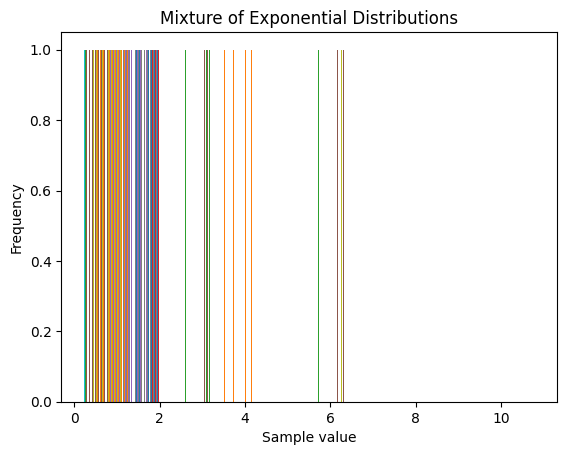

In [26]:
plt.hist(samples, bins=5)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.title('Mixture of Exponential Distributions')
plt.show()


In [27]:
# Create a kernel density estimate
density = kde.gaussian_kde(samples)

# Generate x-axis values for plotting
x = np.linspace(samples.min(), samples.max(), 1000)

# Evaluate the KDE at the x points
y = density(x)


/var/folders/q1/n1z4xy556cjbxzn0zg0twy3m0000gn/T/ipykernel_93076/2733308255.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(samples)


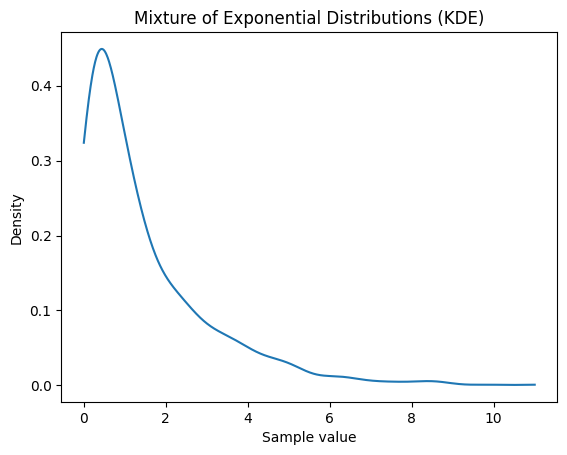

In [28]:

# Plot the KDE
plt.plot(x, y)
plt.xlabel('Sample value')
plt.ylabel('Density')
plt.title('Mixture of Exponential Distributions (KDE)')
plt.show()